In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd /gdrive/MyDrive/dataset

/gdrive/MyDrive/dataset


In [ ]:
%ls

accessories.csv        covtype.csv   data.csv       winequality-red.csv
Admission_Predict.csv  covtype.data  data.gsheet
cancer.csv             cwurData.csv  fullspecs.csv


In [ ]:
import pandas as pd  

In [ ]:
df=pd.read_csv('data - data.csv')

In [20]:
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Contract Valid Until,Height,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,10.0,2021,5'7,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,7.0,2022,6'2,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,92,93,118.5,290.0,2143,5.0,5.0,5.0,10.0,2022,5'9,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,27,91,93,72.0,260.0,1471,4.0,3.0,1.0,1.0,2020,6'4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,27,91,92,102.0,355.0,2281,4.0,5.0,4.0,7.0,2023,5'11,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df.drop(['Name','Photo','Nationality','Flag','Club','Club Logo','Preferred Foot','Work Rate','Body Type','Position','Real Face','Weight'],inplace=True,axis=1)

In [ ]:
df['Value'] = df['Value'].str.replace(r"€","")
df['Value'] = df['Value'].str.replace(r"M","")
df['Value'] = df['Value'].str.replace(r"K","")
df['Value'] = df['Value'].astype(float)

In [ ]:
df['Wage'] = df['Wage'].str.replace(r"€","")
df['Wage'] = df['Wage'].str.replace(r"M","")
df['Wage'] = df['Wage'].str.replace(r"K","")
df['Wage'] = df['Wage'].astype(float)

In [ ]:
df['Release Clause'] = df['Release Clause'].str.replace(r"€","")
df['Release Clause'] = df['Release Clause'].str.replace(r"M","")
df['Release Clause'] = df['Release Clause'].str.replace(r"K","")
df['Release Clause'] = df['Release Clause'].astype(float)

In [63]:
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Contract Valid Until,Height,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,10.0,2021,5'7,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,7.0,2022,6'2,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,92,93,118.5,290.0,2143,5.0,5.0,5.0,10.0,2022,5'9,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,27,91,93,72.0,260.0,1471,4.0,3.0,1.0,1.0,2020,6'4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,27,91,92,102.0,355.0,2281,4.0,5.0,4.0,7.0,2023,5'11,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [64]:
df.drop(['Height','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'],inplace=True,axis=1)

In [68]:
df.drop('Contract Valid Until',inplace=True,axis=1)

In [69]:
df

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,31,94,94,110.5,565.0,2202,5.0,4.0,4.0,10.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,33,94,94,77.0,405.0,2228,5.0,4.0,5.0,7.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,26,92,93,118.5,290.0,2143,5.0,5.0,5.0,10.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,27,91,93,72.0,260.0,1471,4.0,3.0,1.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,27,91,92,102.0,355.0,2281,4.0,5.0,4.0,7.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,47,65,60.0,1.0,1307,1.0,2.0,2.0,22.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0
18203,243165,19,47,63,60.0,1.0,1098,1.0,2.0,2.0,21.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0
18204,241638,16,47,67,60.0,1.0,1189,1.0,3.0,2.0,33.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0
18205,246268,17,47,66,60.0,1.0,1228,1.0,3.0,2.0,34.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0


In [73]:
index_with_nan = df.index[df.isnull().any(axis=1)]

In [74]:
index_with_nan.shape

(1564,)

In [75]:
df.drop(index_with_nan,0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [76]:
df.shape

(16643, 46)

In [77]:
from sklearn.cluster import KMeans

In [78]:
df.dtypes

ID                            int64
Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Special                       int64
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Jersey Number               float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 float64
BallControl                 float64
Acceleration                float64
SprintSpeed                 float64
Agility                     float64
Reactions                   float64
Balance                     float64
ShotPower                   float64
Jumping                     

In [94]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

In [95]:
kmeans.labels_

array([2, 1, 2, ..., 0, 0, 0], dtype=int32)

In [96]:
kmeans.cluster_centers_

array([[2.31321510e+05, 2.29604232e+01, 6.39989610e+01, 7.13404175e+01,
        2.84658591e+02, 5.72400113e+00, 1.54029196e+03, 1.02049684e+00,
        2.89874374e+00, 2.29762917e+00, 2.17512043e+01, 4.73246434e+01,
        4.36034760e+01, 5.03227543e+01, 5.67503542e+01, 4.01981676e+01,
        5.41175026e+01, 4.41555681e+01, 3.96717673e+01, 5.02605082e+01,
        5.64650987e+01, 6.51627468e+01, 6.52178143e+01, 6.26321904e+01,
        5.90301313e+01, 6.41888165e+01, 5.26533484e+01, 6.34125815e+01,
        6.17751015e+01, 6.28602059e+01, 4.40664966e+01, 5.25794843e+01,
        4.40414659e+01, 4.79052612e+01, 5.08381978e+01, 4.63937848e+01,
        5.52976292e+01, 4.54768112e+01, 4.60615850e+01, 4.43947294e+01,
        1.59035610e+01, 1.57172003e+01, 1.55890243e+01, 1.56000756e+01,
        1.60094455e+01, 2.48313639e+02],
       [6.60840351e+04, 3.53552632e+01, 6.97149123e+01, 6.97192982e+01,
        1.98128070e+02, 1.31842105e+01, 1.54350877e+03, 1.62280702e+00,
        3.05263158e+00,

In [97]:
kmeans.predict([[1.87878264e+05, 2.89459506e+01, 6.99545299e+01, 7.08340769e+01,
        2.42564053e+02, 1.65523336e+01, 1.69749056e+03, 1.26630062e+00,
        3.01887440e+00, 2.45521620e+00, 1.60245367e+01, 5.39027111e+01,
        4.84406314e+01, 5.55955731e+01, 6.19519561e+01, 4.72160261e+01,
        5.72930679e+01, 5.22371311e+01, 4.83580988e+01, 5.70020590e+01,
        6.14152368e+01, 6.37685312e+01, 6.39689430e+01, 6.50828758e+01,
        6.65622855e+01, 6.36204530e+01, 6.00576527e+01, 6.82264928e+01,
        6.61942347e+01, 6.96292038e+01, 5.19413178e+01, 6.19873027e+01,
        5.18985930e+01, 5.32218600e+01, 5.76825669e+01, 5.18620453e+01,
        6.42173988e+01, 5.08675360e+01, 5.11585450e+01, 4.84835278e+01,
        1.77652711e+01, 1.74296500e+01, 1.72719629e+01, 1.75873370e+01,
        1.78155456e+01, 1.92973644e+02]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=int32)

In [98]:
kmeans.score(df)

-3391215105067.975

In [99]:
wcc=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
  wcc.append(kmeans.inertia_)

In [100]:
wcc

[6544044079953.541,
 3391215105067.9746,
 1731814517051.2769,
 1052902097326.2654,
 690093620310.9945,
 496489760681.2561,
 382649674566.24774,
 313420552876.3906,
 245169540679.74188]

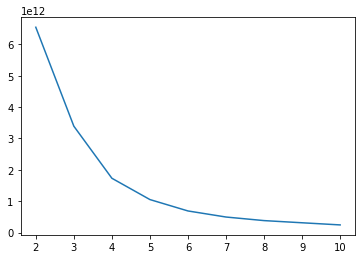

In [101]:
no_of_clusters = [i for i in range(2,11)]
import matplotlib.pyplot as plt

plt.plot(no_of_clusters,wcc)

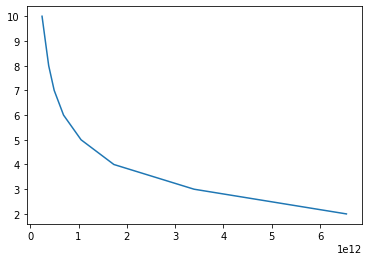

In [102]:
plt.plot(wcc,no_of_clusters)

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
Clustering = AgglomerativeClustering(distance_threshold=3, n_clusters=None).fit(df)

In [105]:
Clustering.labels_

array([10655,  8399, 11015, ...,     5,     2,     0])

In [106]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

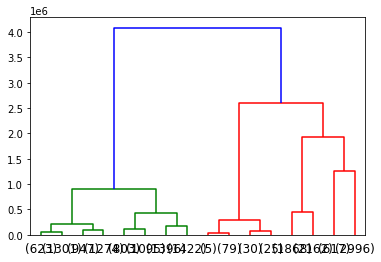

In [107]:
plot_dendrogram(Clustering, truncate_mode="level", p=3)